# IMDB Movie Reviews Sentiment Analysis using Jointly Learned Embeddings

#### Preprocessed IMDB data that comes packaged with Keras is used here.

In [1]:
# Imports required packages

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import matplotlib.pyplot as plt

In [20]:
max_features = 10000     # count of most common words
embedding_dim = 100      # dimension of embedding
max_input_length = 100   # number of review words to into consideration

In [21]:
# Loads train and test data from preprocessed IMDB database that comes with Keras

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [22]:
print("Train samples count:", x_train.shape[0],
      "\nTest samples count:", x_test.shape[0])

Train samples count: 25000 
Test samples count: 25000


In [23]:
# Pads reviews to be of same size

x_train = pad_sequences(x_train, maxlen = max_input_length)
x_test = pad_sequences(x_test, maxlen = max_input_length)

In [24]:
# Creates model

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length = max_input_length))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [25]:
# Shows the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [26]:
epochs = 10
batch_size = 32

history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = .2)

Epoch 1/10
625/625 [==============================] - 25s 39ms/step - loss: 0.5385 - acc: 0.7046 - val_loss: 0.3464 - val_acc: 0.8476
Epoch 2/10
625/625 [==============================] - 24s 39ms/step - loss: 0.1577 - acc: 0.9446 - val_loss: 0.4326 - val_acc: 0.8252
Epoch 3/10
625/625 [==============================] - 24s 39ms/step - loss: 0.0161 - acc: 0.9964 - val_loss: 0.6394 - val_acc: 0.8168
Epoch 4/10
625/625 [==============================] - 25s 39ms/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.8616 - val_acc: 0.8190
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 8.7617e-05 - acc: 1.0000 - val_loss: 1.0331 - val_acc: 0.8156
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 3.1594e-07 - acc: 1.0000 - val_loss: 1.1889 - val_acc: 0.8208
Epoch 7/10
625/625 [==============================] - 26s 41ms/step - loss: 7.1849e-09 - acc: 1.0000 - val_loss: 1.2222 - val_acc: 0.8206
Epoch 8/10
625/625 [==============================

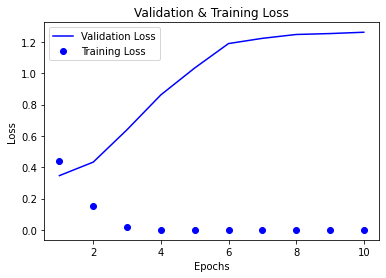

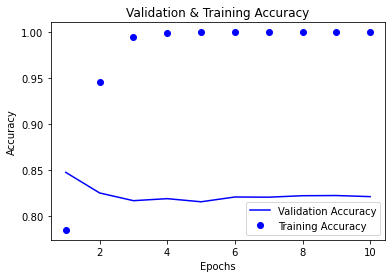

In [27]:
# Evaluates training and validation performance

history_dict = history.history

epoch_range = range(1, len(history_dict["acc"]) + 1)

train_losses = history_dict["loss"]
val_losses = history_dict["val_loss"]

train_accuracies = history_dict["acc"]
val_accuracies = history_dict["val_acc"]

plt.plot(epoch_range, val_losses, "b", label = "Validation Loss")
plt.plot(epoch_range, train_losses, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")


plt.figure()

plt.plot(epoch_range, val_accuracies, "b", label = "Validation Accuracy")
plt.plot(epoch_range, train_accuracies, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation & Training Accuracy")

plt.show()

In [28]:
print("Validation Loss:", history_dict["val_loss"][-1],
      "\nValidation Accuracy:", history_dict["val_acc"][-1])

Validation Loss: 1.2611371278762817 
Validation Accuracy: 0.8212000131607056


In [29]:
eval_result = model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 1.2754 - acc: 0.8233


In [30]:
print("Test Loss:", eval_result[0],
      "\nTest Accuracy:", eval_result[1])

Test Loss: 1.2753734588623047 
Test Accuracy: 0.8232799768447876


### Refer the next notebook for comparison amongst models.